# P8 Building Customer Segmentation Models using Python

### **Name**: Ashutosh Singh Thakur
### **Internship Registraion ID**: STU64441c688f2781682185320

## Problem:
> In this project, we delve deep into the thriving sector of __online retail__ by analyzing a __transactional dataset__ from a UK-based retailer, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through __customer segmentation__. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the __K-means clustering__ algorithm. This segmentation will allow us to understand the distinct __profiles__ and preferences of different customer groups. Building upon this, we intend to develop a __recommendation system__ that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.



## Objectives:
> **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

<a id="contents_table"></a>
## Table of Contents:
* [Step 1 | Setup and Initialization](#setup)
    - [Step 1.1 | Importing Necessary Libraries](#libraries)
    - [Step 1.2 | Loading the Dataset](#load_dataset)
* [Step 2 | Initial Data Analysis](#initial_analysis)
    - [Step 2.1 | Dataset Overview](#overview)
    - [Step 2.2 | Summary Statistics](#statistics)
* [Step 3 | Data Cleaning & Transformation](#data_cleaning)
    - [Step 3.1 | Handling Missing Values](#missing_values)
    - [Step 3.2 | Handling Duplicates](#duplicates)
    - [Step 3.3 | Treating Cancelled Transactions](#InvoiceNo_cleaning)
    - [Step 3.4 | Correcting StockCode Anomalies](#StockCode_cleaning)
    - [Step 3.5 | Cleaning Description Column](#Description_cleaning)
    - [Step 3.6 | Treating Zero Unit Prices](#UnitPrice_cleaning)

<a id="setup"></a>
## **Step 1 | Setup and Initialization**
⬆️ [Tabel of Contents](#contents_tabel)

<a id="libraries"></a>
### **Step 1.1 | Importing Necessary Libraries**

> First of all, we will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

<a id="load_dataset"></a>
### **Step 1.2 | Loading the Dataset**

> Next, we will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [ ]:
# Construct the download URL with the file ID
file_id = '1F9FA10g3I35gpExNESryCmJdHkV1GoGP'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file
df = pd.read_csv(download_url, encoding='ISO-8859-1')

#### Dataset Description:

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |

<a id="initial_analysis"></a>
## **Step 2 | Initial Data Analysis**

> Next, we will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

<a id="overview"></a>
### **Step 2.1 | Dataset Overview**

> First we will perform a preliminary analysis to understand the structure and types of data columns:

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Inferences:


1. **Size of the Dataset**: The dataset contains records for 541,909 transactions, each described by 8 attributes.

2. **Data Types**:
   - Columns such as `InvoiceNo`, `StockCode`, `Description`, `InvoiceDate` and `Country` appear to contain text or categorical information.
   - The column labeled Quantity is represented by integers that are whole numbers indicating the number of items bought.
   - `UnitPrice` and `CustomerID` columns are probably numeric values which include prices and customer identification respectively.

3. **Missing Values**:
   - About 1,454 entries are missing descriptions for items.
   - There are 135,080 entries without customer IDs, which could mean that those transactions were anonymous or incomplete.

4. **Memory Usage**: The dataset has a memory size of about 33.1+ MB, which is quite sizable.

5. **Potential Data Quality Issues**:
   - Missing data for description and customers’ id may affect the analysis and therefore this should be handled with care

6. **Potential Analysis Opportunities**:
   - Identify sales trends over time using the InvoiceDate field
   - Understanding customer behavior and preferences using `CustomerID` and `Country` information.
   - Analysis of product popularity and performance based on StockCode & Description

 <a id="statistics"></a>
### **Step 2.2 | Summary Statistics**

> Now, we are going to generate summary statistics to gain initial insights into the data distribution:

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


#### Inferences:


1. **`Quantity`**:
   - The average quantity of items purchased per transaction is approximately 9.55.
   - There are great variations in the quantity of goods purchased as shown by the standard deviation of 218.08.
   - The minimum quantity is -80995, which seems unusual and may require further investigation.

2. **`UnitPrice`**:
   - On average, a unit price for goods is about 4.61 dollars.
   - There is quite a large standard deviation of 96.76 which means that item prices vary greatly from each other.
   - The minimum unit price is -11062.06, which also seems unusual and requires investigation.

3. **`CustomerID`**:
   - The dataset contains 406,829 non-null customer IDs out of 541,909 entries, indicating missing customer IDs for some transactions.

4. **`InvoiceNo`, `StockCode`, `Description`, `InvoiceDate`, `Country`**:
   - There are 25900 unique invoice numbers, indicating the number of distinct transactions.
   - The most common invoice number is 573585, occurring 1114 times.
   - There are 4070 unique stock codes and 4223 unique descriptions.
   - The most frequent stock code is 85123A, occurring 2313 times.
   - The most frequent description is "WHITE HANGING HEART T-LIGHT HOLDER," occurring 2369 times.
   - There are 38 unique countries in the dataset, with the majority of transactions (495,478) from the United Kingdom.

<a id="data_cleaning"></a>
## **Step 3 | Data Cleaning & Transformation**

> This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

<a id="missing_values"></a>
### **Step 3.1 | Handling Missing Values**

> Initially, I will determine the percentage of missing values present in each column, followed by selecting the most effective strategy to address them:

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

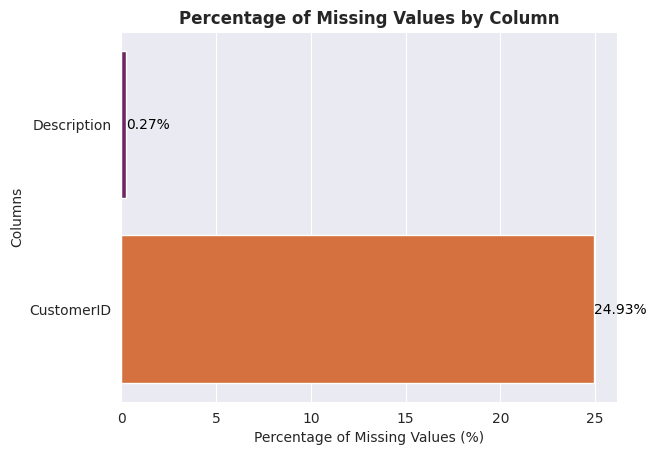

In [ ]:
# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Create a horizontal bar plot using seaborn
ax = sns.barplot(x=missing_percentage, y=missing_percentage.index, palette="inferno")

# Set the title and labels
plt.title('Percentage of Missing Values by Column', fontweight='bold')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Columns')

# Annotate the bars with the percentage values
for i, v in enumerate(missing_percentage):
    ax.text(v, i, f'{v:.2f}%', color='black', ha='left', va='center')

plt.show()


#### Handling Missing Values Strategy:

- __`CustomerID` (24.93% missing values)__
   - The `CustomerID` column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
    
   - Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing `CustomerID`s seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

    
- __`Description` (0.27% missing values)__
   - The `Description` column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same `StockCode` does not always have the same `Description`. This indicates data quality issues and potential errors in the product descriptions.
    
   - Given these inconsistencies, imputing the missing descriptions based on `StockCode` might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing `Description`s to avoid propagating errors and inconsistencies into the subsequent analyses.
   
> By removing rows with missing values in the `CustomerID` and `Description` columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.

In [ ]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df.dropna(subset=['CustomerID', 'Description'], inplace=True)
# Verifying the removal of missing values
df.isnull().sum().sum()

0

<a id="duplicates"></a>
### **Step 3.2 | Handling Duplicates**

> Next, I am going to recognize duplicate rows in the dataset:

In [ ]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


#### **Handling Duplicates Strategy**:
* In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

* Therefore, I am going to remove these completely identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it would help in creating a more precise recommendation system by correctly identifying the products with the most purchases.

In [ ]:
df.duplicated().sum()

5225

In [ ]:
# Droping the duplicate rows from dataframe
df.drop_duplicates(inplace=True)
# Getting the number of rows in the dataframe
df.shape[0]

401604

<a id="InvoiceNo_cleaning"></a>
### **Step 3.3 | Treating Cancelled Transactions**

> To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the `InvoiceNo` starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:

In [ ]:
# Create a new column 'Transaction_Status' based on 'InvoiceNo' values
# If 'InvoiceNo' starts with 'C', set 'Transaction_Status' to 'Cancelled', otherwise set it to 'Completed'
df['Transaction_Status'] = df['InvoiceNo'].apply(lambda x: 'Cancelled' if str(x).startswith('C') else 'Completed')

# Filter the DataFrame to include only rows where 'Transaction_Status' is 'Cancelled'
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,Cancelled
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,Cancelled
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,Cancelled
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,Cancelled


#### Inferences from the Cancelled Transactions Data:
* Every single quantity in the cancelled transactions is negative, so it can be inferred that these are indeed orders that were cancelled.

* The range of unit prices in these cancelled transactions highlights the diversity of products involved, ranging from low-cost items to high-value goods. This suggests that customers cancelled orders for a variety of products, spanning different price ranges and types of items.

#### Strategy for Handling Cancelled Transactions:
> Considering the project's objective to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

* Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.

* Allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.

In [ ]:
# Printing the percentage of cancelled transactions
print(f'The percentage of cancelled transactions in the dataset is: {(cancelled_transactions.shape[0] / df.shape[0]) * 100:.2f}%')

The percentage of cancelled transactions in the dataset is: 2.21%


<a id="StockCode_cleaning"></a>
### **Step 3.4 | Correcting StockCode Anomalies**

> First of all, lets find the number of unique stock codes and to plot the top 10 most frequent stock codes along with their percentage frequency:

In [ ]:
# Finding the number of unique stock codes
df['StockCode'].nunique()

3684

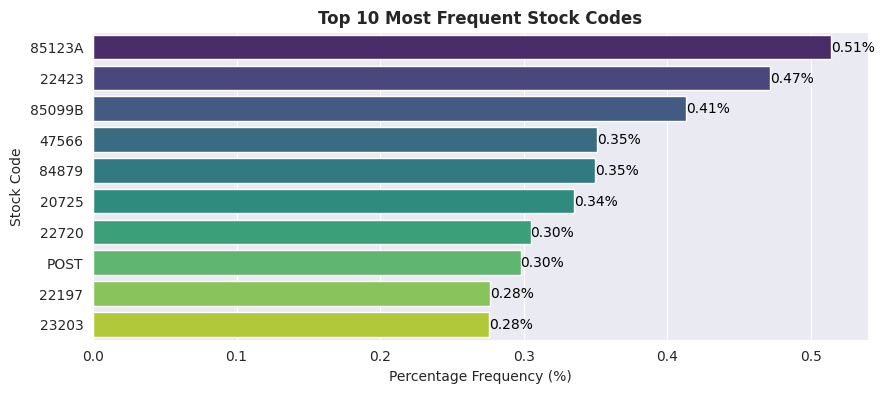

In [ ]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100
# Create a horizontal bar plot using seaborn
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=top_10_stock_codes, y=top_10_stock_codes.index, palette="viridis")

# Set the title and labels
plt.title('Top 10 Most Frequent Stock Codes', fontweight='bold')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Code')

# Annotate the bars with the percentage values
for i, v in enumerate(top_10_stock_codes):
    ax.text(v, i, f'{v:.2f}%', color='black', ha='left', va='center')
plt.show()

#### Inferences on Stock Codes:
1. **Number of Unique Stock Codes**: There are 3,684 unique stock codes in the dataset, indicating a wide variety of products being sold.

2. **Top 10 Stock Codes**:
   - The most frequently purchased item in the dataset is the stock code “85123A” with a share of 0.51% out of all its transactions.
   - The top 10 stock codes together represent a small percentage of the total transactions, it means that there are many other low-frequency items as well.

> Hence, this data suggests that there are various products in our data set where some have higher popularity than others. Knowing how popular these items are would help to manage inventory and come up with marketing strategies that would help push sales for less popular items.

In [ ]:
unique_stock_codes = df['StockCode'].unique()
digit_counts = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts().reset_index()
digit_counts.columns = ['Digit Count', 'Frequency']
digit_counts

,Digit Count,Frequency
0,5,3676
1,0,7
2,1,1


#### Inference:
- 5 occurs in 3,676 different stock codes suggesting that it has been used as number character more often than any other numeric character in stock codes.
- Anomalies in stock codes include 7 entries with no numeric characters and 1 entry with only 1 numeric character.
- These deviations from the standard 5-digit format require further investigation to determine their nature and validity.

> Resolving these anomalies is essential for maintaining data integrity and accuracy in analysis.

In [ ]:
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

for code in anomalous_stock_codes:
    print(f'{code}')

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


> Let's calculate the percentage of records with these anomalous stock codes:

In [ ]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


#### Inference:

- Upon considering the details, what we’ve seen is that a small portion (0.48%) of the files feature such kind of unfamiliar stock codes. They seem to differ significantly from the common ones like those having 5 figures. Curiously, out of 3,684 different stock codes, there are only eight of these strange ones.
- Strangely enough, these weird codes may mean such things as “BANK CHARGES” or “POST,” that might be for posting overheads. Their rarity and their abstractness suggest that it may be inappropriate to include them in our analysis because they could interfere with our efforts in grouping similar together or making suggestions based on this classification.

> It would probably be better to exclude them so that our analyses can remain accurate and reliable.

#### Strategy:
> Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

> Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:

In [ ]:
# Filter out rows with anomalous stock codes
df = df[~df['StockCode'].isin(anomalous_stock_codes)]
# Getting the number of rows in the dataframe
df.shape[0]

399689

<a id="Description_cleaning"></a>
### **Step 3.5 | Cleaning Description Column**

> First, we will calculate the occurrence count of each unique description in the dataset. Then, we will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

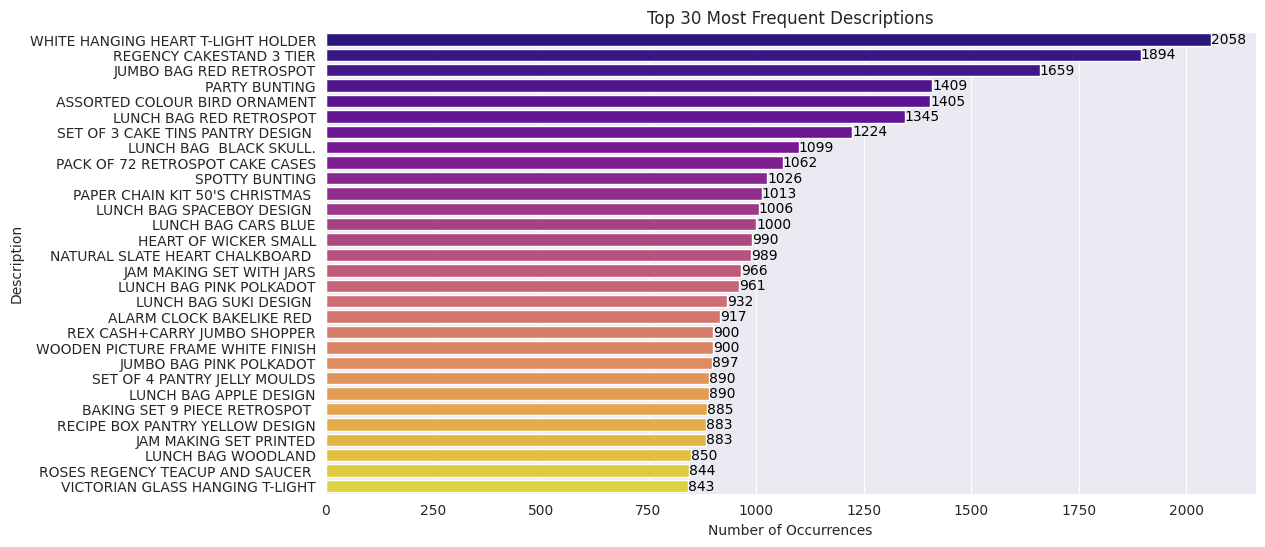

In [ ]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Sort descriptions from highest count to lowest count
top_30_descriptions = description_counts.head(30).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_30_descriptions, y=top_30_descriptions.index, palette="plasma")

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Annotate the bars with the counts
for i, v in enumerate(top_30_descriptions):
    ax.text(v, i, str(v), color='black', ha='left', va='center')

plt.show()

#### Inferences on Descriptions:
* The most frequent descriptions are generally household items, particularly
those associated with kitchenware, lunch bags, and decorative items.

* Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [ ]:
# Find unique descriptions containing lowercase characters
descriptions_lowercase = df[df['Description'].str.contains(r'[a-z]')]['Description'].unique()

# Print the unique descriptions
for desc in descriptions_lowercase:
    print(desc)

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


#### Inference:
* Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "__Next Day Carriage__" and "__High Resolution Image__". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

#### Strategy:
* __Step 1__: Remove the rows where the descriptions contain service-related information like "__Next Day Carriage__" and "__High Resolution Image__", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.

* __Step 2__: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.

> By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.

In [ ]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

The percentage of records with service-related descriptions in the dataset is: 0.02%


<a id="UnitPrice_cleaning"></a>
### **Step 3.6 | Treating Zero Unit Prices**

> In this step, first I am going to take a look at the statistical description of the `UnitPrice` column:

In [ ]:
df['UnitPrice'].describe()

count    399689.000000
mean          2.907457
std           4.451881
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

#### Inference:

Based on the summary statistics of the UnitPrice column:

- The zero minimum unit price means that there must have been some transactions with free items or the ones with no cost.

- Determining this kind of transactions is important in order to understand what they are all about and if they are real.

- A more thorough analysis of product descriptions that have zero unit prices will be made to determine any peculiar trends and explanations behind those transactions.

In [ ]:
df[df['UnitPrice']==0].describe()['Quantity']

count       33.000000
mean       420.515152
std       2176.713608
min          1.000000
25%          2.000000
50%         11.000000
75%         36.000000
max      12540.000000
Name: Quantity, dtype: float64

#### Inferences on UnitPrice:
* The transactions with a unit price of zero are relatively few in number (33 transactions).

* These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.

* Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.

#### Strategy:
> Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.

In [ ]:
# Remove records with a unit price of zero
df = df[df['UnitPrice'] != 0]

<a id="outlier_cleaning"></a>
### **Step 3.7 | Outlier Treatment**

In [ ]:
df.shape[0]

399656